# Slide model with nonlinear return mapping

In [1]:
import sympy as sp
sp.init_printing()

## Material parameters

In [2]:
E_b = sp.Symbol('E_b', real=True)
gamma = sp.Symbol('gamma', real=True)
K = sp.Symbol('K', real=True)
S = sp.Symbol('S', real=True)
r = sp.Symbol('r', real=True)
c = sp.Symbol('c', real=True)
tau_bar = sp.Symbol(r'\bar{\tau}', real=True)
m = sp.Symbol('m', real=True)

## Control parameter

In [3]:
sigma_N = sp.Symbol('sigma_N', real=True)

## State variables

In [4]:
s = sp.Symbol('s', real=True)
omega = sp.Symbol('omega', real=True, nonnegative=True)
omega.is_nonnegative
s_pi = sp.Symbol(r's^{\pi}', real=True)
alpha = sp.Symbol('alpha', real=True)
z = sp.Symbol('z', real=True)
dot_lambda = sp.Symbol(r'\dot{\lambda}', real=True)

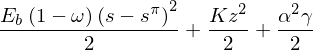

In [5]:
rho_phi = sp.Rational(1,2)* ( (1-omega)*E_b*(s-s_pi)**2 + gamma * alpha**2 + K * z**2)
rho_phi

## Thermodynamic forces

In [6]:
tau = sp.Symbol('tau', real=True)
tau_pi = sp.Symbol(r'\tau^{\pi}', real=True)
X = sp.Symbol('X', real=True)
Z = sp.Symbol('Z', real=True)
Y = sp.Symbol('Y', real=True)

In [7]:
#tau_tilde_pi = tau_pi / ( 1 - omega ) 

## Threshold 

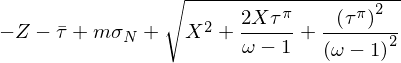

In [8]:
f = sp.Abs(tau_pi / (1 - omega) - X) - Z - tau_bar + m * sigma_N
f

## Flow potential

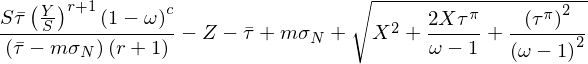

In [9]:
phi = f + S* (1-omega)**c / (r+1) * (Y/S)**(r+1) * tau_bar / (tau_bar - m * sigma_N) 
phi

## Evolution equations

In [10]:
dot_s_pi = dot_lambda * phi.diff(tau_pi)
dot_z = - dot_lambda * phi.diff(Z)
dot_alpha = - dot_lambda * phi.diff(X)
dot_omega = dot_lambda * phi.diff(Y)

## Thermodynamic forces

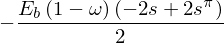

In [11]:
x_tau_pi = -rho_phi.diff(s_pi)
x_X = rho_phi.diff(alpha)
x_Z = rho_phi.diff(z)
x_tau_pi

## Rates of thermodynamic forces

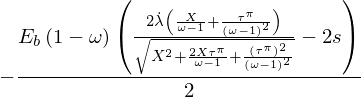

In [13]:
dot_tau_pi = -rho_phi.diff(s_pi).subs(s_pi, dot_s_pi)
dot_X = rho_phi.diff(alpha).subs(alpha, dot_alpha)
dot_Z = rho_phi.diff(z).subs(z, dot_z)
dot_tau_pi

## Derivatives of the threshold function

In [14]:
d_f_tau_pi = f.diff(tau_pi)
d_f_X = f.diff(X)
d_f_Z = f.diff(Z)

## Consistency condition

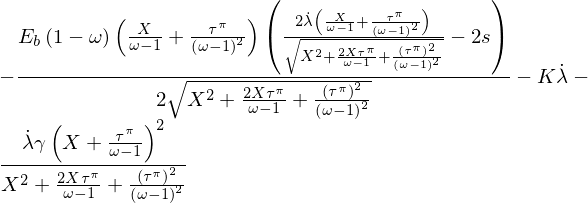

In [15]:
dot_f = dot_tau_pi * d_f_tau_pi + dot_X * d_f_X + dot_Z * d_f_Z
dot_f

## Return mapping expression

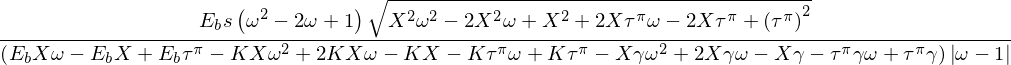

In [16]:
dot_lambda_solved = sp.solve(dot_f, dot_lambda)[0]
dot_lambda_solved

## Lambda with resolved state variables

In [16]:
dot_lambda_state = sp.simplify(dot_lambda_solved.subs({tau_pi:x_tau_pi, X:x_X, Z:x_Z}))

In [17]:
data_dict = {E_b:1, gamma:1, K:1, S:1, r:1, c:1, m:1, tau_bar:1, sigma_N : 0}

In [18]:
state_dict = {s_pi:1, alpha:1, z:0, omega:sp.Rational(1,2) }

In [19]:
dot_lambda_test = dot_lambda_state.subs(data_dict).subs(state_dict)

In [20]:
sp.simplify(dot_f.subs({tau_pi:x_tau_pi, X:x_X, Z:x_Z}).subs(data_dict).subs(state_dict).subs(dot_lambda, dot_lambda_test))

In [21]:
from sympy.utilities.codegen import codegen

In [22]:
codegen(('dot_lambda', dot_lambda_state),'C89')

[('dot_lambda.c',
  '/******************************************************************************\n *                       Code generated with sympy 1.4                        *\n *                                                                            *\n *              See http://www.sympy.org/ for more information.               *\n *                                                                            *\n *                       This file is part of \'project\'                       *\n ******************************************************************************/\n#include "dot_lambda.h"\n#include <math.h>\n\ndouble dot_lambda(double E_b, double K, double alpha, double gamma, double omega, double s, double s^{\\pi}) {\n\n   double dot_lambda_result;\n   dot_lambda_result = -E_b*s*(pow(omega, 2) - 2*omega + 1)*sqrt(pow(E_b, 2)*pow(omega - 1, 2)*pow(s - s^{\\pi}, 2) - 2*E_b*alpha*gamma*omega*(omega - 1)*(s - s^{\\pi}) + 2*E_b*alpha*gamma*(omega - 1)*(s - s^{\\pi}) + p